In [1]:
from qulacs import Observable, QuantumCircuit, QuantumState, ParametricQuantumCircuit,QuantumCircuitSimulator
from qulacs.gate import Y,CNOT,merge

In [2]:
import numpy as np

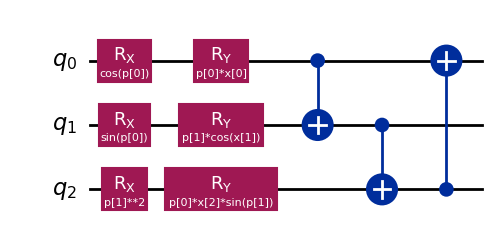

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector


p = ParameterVector('p',2)
x = ParameterVector('x',3)

qc = QuantumCircuit(3)

qc.rx(np.cos(p[0]),0)
qc.rx(np.sin(p[0]),1)
qc.rx(p[1]*p[1],2)

qc.ry(p[0]*x[0],0)
qc.ry(p[1]*np.cos(x[1]),1)
qc.ry(p[0]*np.sin(p[1])*x[2],2)

qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,0)

#qc.rx(np.cos(p[0]),0)
#qc.rx(np.sin(p[1]),1)
#qc.rx(2.0*p[2],2)


#from qiskit.circuit.random import random_circuit
#qc = random_circuit(3, 10, seed=41)
qc.draw()

In [4]:
# from squlearn.encoding_circuit import HubregtsenEncodingCircuit
# from qiskit.circuit import ParameterVector



# pqc = HubregtsenEncodingCircuit(3,2,2)

# p = ParameterVector('p',3)
# x = ParameterVector('x',pqc.num_features)

# qc = pqc.get_circuit(p,x)
# qc.draw()

In [5]:
np.random.seed(0)
param = np.random.random(2)
x_val = np.random.random(3)
param_obs = np.random.random(8)

#print(pqc.num_parameters)
#print(pqc.num_features)

In [6]:
from squlearn.observables import SummedPaulis

obs = SummedPaulis(3,)

obs.get_operator(ParameterVector('p',4))

SparsePauliOp(['III', 'IIZ', 'IZI', 'ZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3])])

In [7]:
from qiskit.quantum_info import SparsePauliOp

p_obs = ParameterVector('p_obs',8)

obs = SparsePauliOp('ZZZ',)

obs2= [
    SparsePauliOp('IIZ',p_obs[0])+SparsePauliOp('IZI',p_obs[1])+SparsePauliOp('ZII',p_obs[2]),
    SparsePauliOp('IIX',p_obs[3])+SparsePauliOp('IXI',p_obs[4])+SparsePauliOp('XII',p_obs[5]),
    SparsePauliOp('IIY',p_obs[6])+SparsePauliOp('IYI',1.0)+SparsePauliOp('YII',p_obs[7])
]

In [8]:
obs2 = [(obs2[0]**2).simplify().simplify(),(obs2[1]**2).simplify().simplify(),(obs2[2]**2).simplify().simplify()]
print(obs2)

[SparsePauliOp(['III', 'IZZ', 'ZIZ', 'ZZI'],
              coeffs=[ParameterExpression(1.0*p_obs[0]**2 + 1.0*p_obs[1]**2 + 1.0*p_obs[2]**2),
 ParameterExpression(2.0*p_obs[0]*p_obs[1]),
 ParameterExpression(2.0*p_obs[0]*p_obs[2]),
 ParameterExpression(2.0*p_obs[1]*p_obs[2])]), SparsePauliOp(['III', 'IXX', 'XIX', 'XXI'],
              coeffs=[ParameterExpression(1.0*p_obs[3]**2 + 1.0*p_obs[4]**2 + 1.0*p_obs[5]**2),
 ParameterExpression(2.0*p_obs[3]*p_obs[4]),
 ParameterExpression(2.0*p_obs[3]*p_obs[5]),
 ParameterExpression(2.0*p_obs[4]*p_obs[5])]), SparsePauliOp(['III', 'IYY', 'YIY', 'YYI'],
              coeffs=[ParameterExpression(1.0*p_obs[6]**2 + 1.0*p_obs[7]**2 + 1.0),
 ParameterExpression(2.0*p_obs[6]),
 ParameterExpression(2.0*p_obs[6]*p_obs[7]),
 ParameterExpression(2.0*p_obs[7])])]


In [9]:

from squlearn.util.qulacs import *



test = QulacsCircuit(qc, obs2)


print("test._operation_list",test._operation_list)
print("test._param_list",test._param_list)
print("test._qubit_list",test._qubit_list)
print("test._func_list",test._func_list)
print("test._func_grad_list",test._func_grad_list)
print("test._used_parameters",test._used_parameters)

print("test.new_operators",test.new_operators)
print("test.new_operators_coeff",test.new_operators_coeff)
print("test.new_operators_coeff_grad",test.new_operators_coeff_grad)
print("test.new_operators_used_parameters",test.new_operators_used_parameters)

test._operation_list ['rx', 'ry', 'rx', 'ry', 'cx', 'rx', 'ry', 'cx', 'cx']
test._param_list []
test._qubit_list [[0], [0], [1], [1], [0, 1], [2], [2], [1, 2], [2, 0]]
test._func_list [<function _lambdifygenerated at 0x00000206997CFF70>, <function _lambdifygenerated at 0x00000206997CF550>, <function _lambdifygenerated at 0x00000206997E28B0>, <function _lambdifygenerated at 0x00000206997D54C0>, None, <function _lambdifygenerated at 0x00000206997CFB80>, <function _lambdifygenerated at 0x00000206997DEA60>, None, None]
test._func_grad_list [[<function _lambdifygenerated at 0x00000206997D5CA0>], [<function _lambdifygenerated at 0x00000206997D5F70>, <function _lambdifygenerated at 0x00000206997DECA0>], [<function _lambdifygenerated at 0x00000206997DE3A0>], [<function _lambdifygenerated at 0x00000206997CF9D0>, <function _lambdifygenerated at 0x00000206997E23A0>], None, [<function _lambdifygenerated at 0x00000206997D5550>], [<function _lambdifygenerated at 0x00000206997E2820>, <function _lambd

In [10]:
test.get_circuit_func()

<function squlearn.util.qulacs.qulacs_circuit.QulacsCircuit.get_circuit_func.<locals>.qulacs_circuit(*args)>

In [11]:
test._qualcs_obs_parameters

['p_obs']

In [12]:
from squlearn.util.qulacs .qulacs_circuit import evaluate_circuit

evaluate_circuit(test,param,x_val,param_obs)

array([3.09610713, 2.05518824, 1.73381868])

In [13]:
from squlearn.util.qulacs.qulacs_circuit import evaluate_circuit_gradient

px = list(p)+list(x)

evaluate_circuit_gradient(test,p,param,x_val,param_obs)

array([[ 0.35658544, -0.80971051],
       [ 0.75748842,  0.07569617],
       [-0.76960834,  1.15073574]])

In [14]:
evaluate_circuit_statevec(test,param,x_val,param_obs)

NameError: name 'evaluate_circuit_statevec' is not defined

In [ ]:
evaluate_circuit_gradient(test,x,param,x_val,param_obs)

In [ ]:
evaluate_circuit_gradient(test,x[1],param,x_val,param_obs)

In [ ]:
evaluate_circuit_gradient(test,px,param,x_val,param_obs)

In [ ]:
from squlearn.util.qulacs.qulacs_circuit import evaluate_operator_gradient

evaluate_operator_gradient(test,p_obs,param,x_val,param_obs)

In [ ]:
from squlearn.util.qulacs.qulacs_circuit import evaluate_operator_gradient

evaluate_operator_gradient(test,p_obs[0],param,x_val,param_obs)

In [ ]:
from squlearn.qnn.lowlevel_qnn_pennylane import LowLevelQNNPennyLane
from squlearn import Executor
from squlearn.observables import CustomObservable

from squlearn.encoding_circuit import QiskitEncodingCircuit

ec = QiskitEncodingCircuit(qc)
o1 = CustomObservable(3,'IIZ',parameterized=True)+CustomObservable(3,'IZI',parameterized=True)+CustomObservable(3,'ZII',parameterized=True)
o2 = CustomObservable(3,'IIX',parameterized=True)+CustomObservable(3,'IXI',parameterized=True)+CustomObservable(3,'XII',parameterized=True)
o3 = CustomObservable(3,'IIY',parameterized=True)+CustomObservable(3,'IYI',parameterized=False)+CustomObservable(3,'YII',parameterized=True)


qnn = LowLevelQNNPennyLane(ec,[o1*o1,o2*o2,o3*o3],Executor('pennylane'))


print("f\n",qnn.evaluate(x_val,param,param_obs,"f")["f"])
print("dfdp\n",qnn.evaluate(x_val,param,param_obs,"dfdp")["dfdp"])
print("dfdx\n",qnn.evaluate(x_val,param,param_obs,"dfdx")["dfdx"])
print("dfdop\n",qnn.evaluate(x_val,param,param_obs,"dfdop")["dfdop"])
print("x[1]\n",qnn.evaluate(x_val,param,param_obs,x[1])[x[1]])
print("dop[0]\n",qnn.evaluate(x_val,param,param_obs,qnn.parameters_operator[0])[qnn.parameters_operator[0]])